In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

For each test, the mean gflops are computed, grouping the observations by size and by the number of threads. The results are then plotted in a line plot, with the number of threads or the size on the x-axis and the mean gflops on the y-axis.

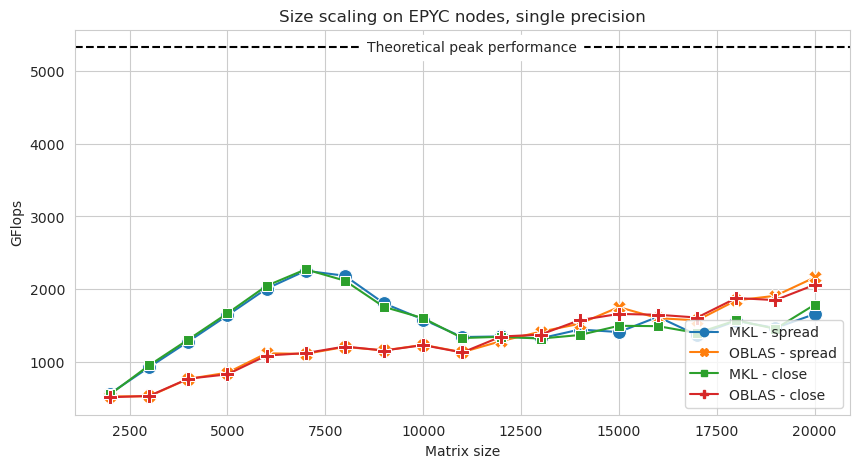

In [5]:
# EPYC nodes - single precision
size_scaling_EPYC_mkl_float_spread = pd.read_csv('results/size_scaling/size_scaling_EPYC_mkl_float_spread.csv', sep=',').groupby('size').mean('gflops').reset_index()
size_scaling_EPYC_mkl_float_spread['test'] = 'MKL - spread'
size_scaling_EPYC_oblas_float_spread = pd.read_csv('results/size_scaling/size_scaling_EPYC_oblas_float_spread.csv', sep=',').groupby('size').mean('gflops').reset_index()
size_scaling_EPYC_oblas_float_spread['test'] = 'OBLAS - spread'
size_scaling_EPYC_mkl_float_close = pd.read_csv('results/size_scaling/size_scaling_EPYC_mkl_float_close.csv', sep=',').groupby('size').mean('gflops').reset_index()
size_scaling_EPYC_mkl_float_close['test'] = 'MKL - close'
size_scaling_EPYC_oblas_float_close = pd.read_csv('results/size_scaling/size_scaling_EPYC_oblas_float_close.csv', sep=',').groupby('size').mean('gflops').reset_index()
size_scaling_EPYC_oblas_float_close['test'] = 'OBLAS - close'

size_scaling_EPYC_float = pd.concat([
    size_scaling_EPYC_mkl_float_spread, 
    size_scaling_EPYC_oblas_float_spread, 
    size_scaling_EPYC_mkl_float_close, 
    size_scaling_EPYC_oblas_float_close
    ])

plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')
sns.lineplot(x='size', y='gflops', hue='test', data=size_scaling_EPYC_float, markers=True, markersize=10, style='test', dashes=False).axhline(y=5324.8, color='black', linestyle='--')
plt.text(x=11250, y=5324.8, s='Theoretical peak performance', va='center', ha='center', backgroundcolor='w')
plt.title('Size scaling on EPYC nodes, single precision')
plt.ylabel('GFlops')
plt.xlabel('Matrix size')
plt.legend(loc='lower right', title='')
plt.show()

None of the libraries reaches the theoretical peak performance.

OBLAS shows better results with bigger matrices, while MKL seem better with small matrices.

Changing binding policy doesn't seem to do much.

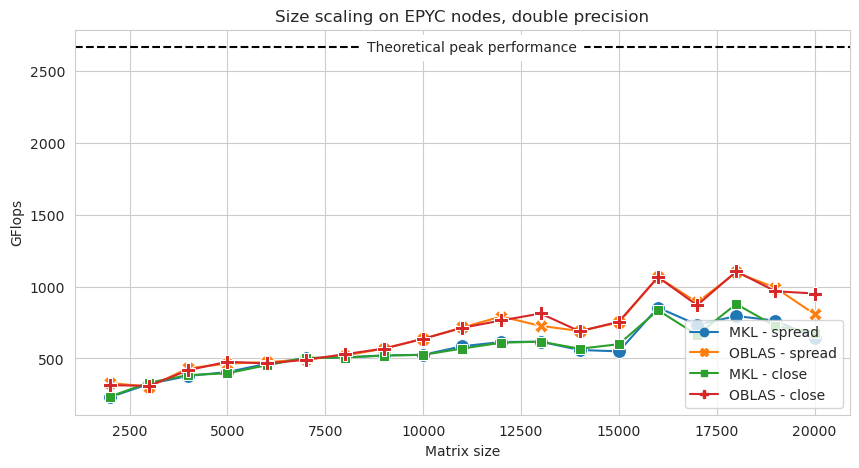

In [6]:
# EPYC nodes - double precision
sizs_scaling_EPYC_mkl_double_spread = pd.read_csv('results/size_scaling/size_scaling_EPYC_mkl_double_spread.csv', sep=',').groupby('size').mean('gflops').reset_index()
sizs_scaling_EPYC_mkl_double_spread['test'] = 'MKL - spread'
size_scaling_EPYC_oblas_double_spread = pd.read_csv('results/size_scaling/size_scaling_EPYC_oblas_double_spread.csv', sep=',').groupby('size').mean('gflops').reset_index()
size_scaling_EPYC_oblas_double_spread['test'] = 'OBLAS - spread'
size_scaling_EPYC_mkl_double_close = pd.read_csv('results/size_scaling/size_scaling_EPYC_mkl_double_close.csv', sep=',').groupby('size').mean('gflops').reset_index()
size_scaling_EPYC_mkl_double_close['test'] = 'MKL - close'
size_scaling_EPYC_oblas_double_close = pd.read_csv('results/size_scaling/size_scaling_EPYC_oblas_double_close.csv', sep=',').groupby('size').mean('gflops').reset_index()
size_scaling_EPYC_oblas_double_close['test'] = 'OBLAS - close'

size_scaling_EPYC_double = pd.concat([
    sizs_scaling_EPYC_mkl_double_spread,
    size_scaling_EPYC_oblas_double_spread,
    size_scaling_EPYC_mkl_double_close,
    size_scaling_EPYC_oblas_double_close
    ])

plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')
sns.lineplot(x='size', y='gflops', hue='test', data=size_scaling_EPYC_double, markers=True, markersize=10, style='test', dashes=False).axhline(y=2662.4, color='black', linestyle='--')
plt.text(x=11250, y=2662.4, s='Theoretical peak performance', va='center', ha='center', backgroundcolor='w')
plt.title('Size scaling on EPYC nodes, double precision')
plt.ylabel('GFlops')
plt.xlabel('Matrix size')
plt.legend(loc='lower right', title='')
plt.show()

Same considerations as before, but here MKL doesn't peak in performance with small matrices.